In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('diabetes.csv')


X, y = df.loc[:, df.columns != 'BloodPressure'], df['BloodPressure']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 0)

Text(0.5, 1.0, 'Predicted vs. Actual Value for BloodPressure')

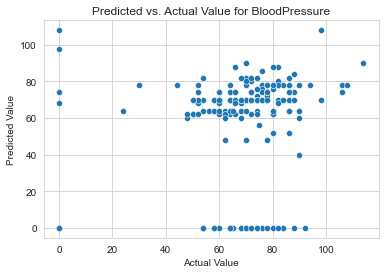

In [6]:
# Make SVM Model

model = svm.SVC(kernel='linear').fit(X_train, y_train)
y_prediction = model.predict(X_test)
sns.set_style('whitegrid')

x_ = y_test
y_ = y_prediction


ax = sns.scatterplot(x = y_test, y = y_prediction)
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Predicted vs. Actual Value for BloodPressure')

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)